<a href="https://colab.research.google.com/github/saimasharleen/thyroid-dataset/blob/main/thyroid2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
#connecting Google Drive with Colab
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [73]:
import pandas as pd
data = pd.read_csv('/content/gdrive/My Drive/Thyroid cancer/dataset/sick-euthyroid.data')

In [74]:
#adding the columns name
data.columns = ['sclass','age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid',
'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']

In [75]:
!pip install catboost

In [76]:
# import main libraries
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from  xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from scipy import stats
from sklearn import metrics
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC

In [77]:
data.head()

,sclass,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,sick-euthyroid,45,F,f,f,f,f,f,f,f,f,f,f,f,y,1.90,y,1,y,82,y,0.73,y,112,n,?
1,sick-euthyroid,64,F,f,f,f,f,f,f,f,t,f,f,f,y,0.09,y,1,y,101,y,0.82,y,123,n,?
2,sick-euthyroid,56,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.80,y,76,y,0.77,y,99,n,?
3,sick-euthyroid,78,F,t,f,f,f,t,f,f,f,f,f,f,y,2.60,y,0.30,y,87,y,0.95,y,91,n,?
4,sick-euthyroid,80,M,f,f,f,f,f,f,f,f,f,f,f,y,1.40,y,0.80,y,105,y,0.88,y,120,n,?


In [78]:
display(data.head(10))

,sclass,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,sick-euthyroid,45,F,f,f,f,f,f,f,f,f,f,f,f,y,1.90,y,1,y,82,y,0.73,y,112,n,?
1,sick-euthyroid,64,F,f,f,f,f,f,f,f,t,f,f,f,y,0.09,y,1,y,101,y,0.82,y,123,n,?
2,sick-euthyroid,56,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.80,y,76,y,0.77,y,99,n,?
3,sick-euthyroid,78,F,t,f,f,f,t,f,f,f,f,f,f,y,2.60,y,0.30,y,87,y,0.95,y,91,n,?
4,sick-euthyroid,80,M,f,f,f,f,f,f,f,f,f,f,f,y,1.40,y,0.80,y,105,y,0.88,y,120,n,?
5,sick-euthyroid,74,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.70,y,98,y,0.81,y,121,n,?
6,sick-euthyroid,?,F,f,f,f,f,f,f,f,f,f,f,f,y,1.40,y,1.10,y,121,y,1.11,y,109,n,?
7,sick-euthyroid,42,F,f,f,f,f,f,f,f,f,f,f,f,y,2.30,y,1.10,y,93,y,0.73,y,127,n,?
8,sick-euthyroid,89,M,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,0.80,y,111,y,0.68,y,165,n,?
9,sick-euthyroid,73,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,1,y,96,y,0.89,y,108,n,?


In [79]:
display(data.dtypes)

sclass                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [80]:
data['sclass'] = data.pop('sclass')

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3162 non-null   object
 1   sex                        3162 non-null   object
 2   on_thyroxine               3162 non-null   object
 3   query_on_thyroxine         3162 non-null   object
 4   on_antithyroid_medication  3162 non-null   object
 5   thyroid_surgery            3162 non-null   object
 6   query_hypothyroid          3162 non-null   object
 7   query_hyperthyroid         3162 non-null   object
 8   pregnant                   3162 non-null   object
 9   sick                       3162 non-null   object
 10  tumor                      3162 non-null   object
 11  lithium                    3162 non-null   object
 12  goitre                     3162 non-null   object
 13  TSH_measured               3162 non-null   object
 14  TSH     

In [82]:
data['sex'] = data['sex'].map({'F': 1, 'M': 0})

In [83]:
display(data.shape)
display(data.head(10))
display(data.dtypes)

(3162, 26)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,sclass
0,45,1.0,f,f,f,f,f,f,f,f,f,f,f,y,1.90,y,1,y,82,y,0.73,y,112,n,?,sick-euthyroid
1,64,1.0,f,f,f,f,f,f,f,t,f,f,f,y,0.09,y,1,y,101,y,0.82,y,123,n,?,sick-euthyroid
2,56,0.0,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.80,y,76,y,0.77,y,99,n,?,sick-euthyroid
3,78,1.0,t,f,f,f,t,f,f,f,f,f,f,y,2.60,y,0.30,y,87,y,0.95,y,91,n,?,sick-euthyroid
4,80,0.0,f,f,f,f,f,f,f,f,f,f,f,y,1.40,y,0.80,y,105,y,0.88,y,120,n,?,sick-euthyroid
5,74,1.0,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.70,y,98,y,0.81,y,121,n,?,sick-euthyroid
6,?,1.0,f,f,f,f,f,f,f,f,f,f,f,y,1.40,y,1.10,y,121,y,1.11,y,109,n,?,sick-euthyroid
7,42,1.0,f,f,f,f,f,f,f,f,f,f,f,y,2.30,y,1.10,y,93,y,0.73,y,127,n,?,sick-euthyroid
8,89,0.0,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,0.80,y,111,y,0.68,y,165,n,?,sick-euthyroid
9,73,0.0,f,f,f,f,f,f,f,f,f,f,f,y,0,y,1,y,96,y,0.89,y,108,n,?,sick-euthyroid


age                           object
sex                          float64
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                           object
T3_measured                   object
T3                            object
TT4_measured                  object
TT4                           object
T4U_measured                  object
T4U                           object
FTI_measured                  object
FTI                           object
TBG_measured                  object
TBG                           object
sclass                        object
dtype: object

In [84]:

display(data.shape)

(3162, 26)

In [85]:
print("Sick-euthyroid:")
sex_series2 = pd.Series(data[data.columns[1]].values)
display(sex_series2.value_counts())


Sick-euthyroid:


1.0    2182
0.0     907
dtype: int64

In [86]:
#start the data pre processing observing the set of possible values for each attribute
for column in data.columns:
    listOfValues=set(data[column])
    print(column,": ",listOfValues)

age :  {'80', '51', '10', '44', '30', '37', '56', '67', '15', '92', '50', '84', '22', '85', '35', '72', '31', '?', '5', '16', '62', '86', '57', '73', '55', '54', '74', '6', '64', '12', '34', '40', '77', '65', '8', '18', '88', '63', '14', '20', '11', '87', '89', '27', '90', '70', '81', '33', '28', '58', '39', '1', '69', '21', '38', '78', '24', '48', '13', '98', '53', '68', '23', '59', '76', '7', '60', '66', '75', '49', '52', '46', '45', '83', '42', '61', '32', '71', '17', '29', '93', '19', '9', '79', '36', '82', '26', '97', '25', '47', '41', '4', '43'}
sex :  {0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan}
on_thyroxine :  {'t', 'f'}
query_on_thyroxine :  {'t', 'f'}

In [87]:
data=data.replace({"?":np.NAN})
data.isna().sum()

age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           467
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2902
sclass                          0
dtype: int64

In [88]:
del data['TBG']

In [89]:
data.dropna(axis = 0, thresh = 20, inplace = True)
data.isna().sum()

age                          418
sex                           68
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          436
T3_measured                    0
T3                           664
TT4_measured                   0
TT4                          218
T4U_measured                   0
T4U                          217
FTI_measured                   0
FTI                          216
TBG_measured                   0
sclass                         0
dtype: int64

In [90]:
#data[['age','TSH','T3','TT4','T4U','FTI']].boxplot()

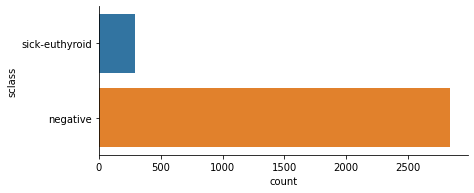

In [91]:
ax = sns.catplot(y='sclass', kind='count', data=data, height=2.6, aspect=2.5)

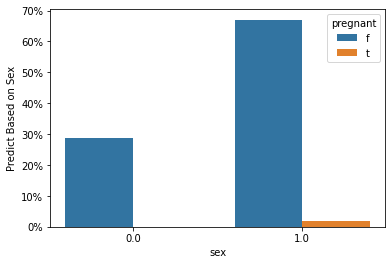

In [92]:
def barplot_percentages(feature, orient='v', axis_name="Predict Based on Sex"):
    ratios = pd.DataFrame()
    g = data.groupby(feature)["pregnant"].value_counts().to_frame()
    g = g.rename({"pregnant": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(data)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='pregnant', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='pregnant', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("sex")

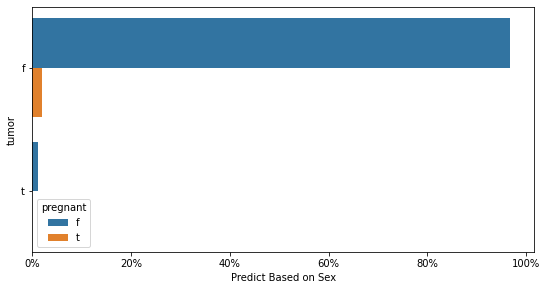

In [93]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("tumor", orient='h')

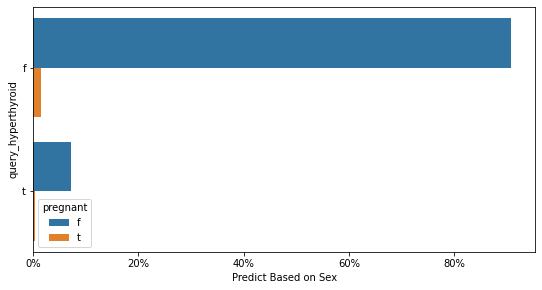

In [94]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("query_hyperthyroid", orient='h')

In [95]:
display(data.head(10))

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,sclass
0,45,1.0,f,f,f,f,f,f,f,f,f,f,f,y,1.90,y,1,y,82,y,0.73,y,112,n,sick-euthyroid
1,64,1.0,f,f,f,f,f,f,f,t,f,f,f,y,0.09,y,1,y,101,y,0.82,y,123,n,sick-euthyroid
2,56,0.0,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.80,y,76,y,0.77,y,99,n,sick-euthyroid
3,78,1.0,t,f,f,f,t,f,f,f,f,f,f,y,2.60,y,0.30,y,87,y,0.95,y,91,n,sick-euthyroid
4,80,0.0,f,f,f,f,f,f,f,f,f,f,f,y,1.40,y,0.80,y,105,y,0.88,y,120,n,sick-euthyroid
5,74,1.0,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.70,y,98,y,0.81,y,121,n,sick-euthyroid
6,NaN,1.0,f,f,f,f,f,f,f,f,f,f,f,y,1.40,y,1.10,y,121,y,1.11,y,109,n,sick-euthyroid
7,42,1.0,f,f,f,f,f,f,f,f,f,f,f,y,2.30,y,1.10,y,93,y,0.73,y,127,n,sick-euthyroid
8,89,0.0,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,0.80,y,111,y,0.68,y,165,n,sick-euthyroid
9,73,0.0,f,f,f,f,f,f,f,f,f,f,f,y,0,y,1,y,96,y,0.89,y,108,n,sick-euthyroid


In [96]:
#For the classification is important that the dataset only has numerical attributes, so I have to encode the categorical values into numerical values
data = data.replace({"t":1,"f":0, "y":1, "n":0, "sick-euthyroid":1, "negative":0,"F":1, "M":0})
display(data.dtypes)

age                           object
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                           object
T3_measured                    int64
T3                            object
TT4_measured                   int64
TT4                           object
T4U_measured                   int64
T4U                           object
FTI_measured                   int64
FTI                           object
TBG_measured                   int64
sclass                         int64
dtype: object

In [97]:
cols = data.columns[data.dtypes.eq('object')]
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
display(data.dtypes)

age                          float64
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
TBG_measured                   int64
sclass                         int64
dtype: object

In [98]:
# Before the training starts, finding the attributes most related to the target
corr_values = abs(data[data.columns[0:]].corr()['sclass'][:])
corr_values = corr_values.drop('sclass')
corr_values = corr_values[corr_values > 0.04]
display(corr_values)

age                   0.209837
sex                   0.055826
on_thyroxine          0.086556
query_hyperthyroid    0.054124
pregnant              0.045583
sick                  0.193114
TSH_measured          0.122650
TSH                   0.056549
T3_measured           0.166383
T3                    0.382726
TT4_measured          0.087734
TT4                   0.127213
T4U_measured          0.087517
T4U                   0.220305
FTI_measured          0.087300
TBG_measured          0.090090
Name: sclass, dtype: float64

In [99]:
#dividing the dataset into two sets: the training set and the testing set
def holdout(dataframe):
  x = dataframe[corr_values.index]
  y = dataframe['sclass']
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42) 
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = holdout(data)

In [100]:
classifiers = {
    "XGBClassifier" : XGBClassifier(learning_rate=0.01),
    "CatBoostClassifier" : CatBoostClassifier(max_depth=4,verbose=0),
}

In [113]:
def classification(classifiers, X_train, X_test, y_train, y_test):
  res = pd.DataFrame(columns=["Classifier", 
                                "Accuracy", 
                                "Precision", 
                                "Recall", 
                                "FScore"])
  for name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            pr, rc, fs, sup = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
            res = res.append({"Classifier": name,"Accuracy": round(metrics.accuracy_score(y_test, y_pred), 4),
                              "Precision": round(pr, 4), "Recall":round(rc, 4), "FScore":round(fs, 4)}, ignore_index=True)
            print("Confusion matrix for: ", name)
            display(confusion_matrix(y_test, y_pred))
  res.set_index("FScore", inplace=True)
  res.sort_values(by="FScore", ascending=False, inplace=True)   
  return res

display(classification(classifiers, X_train, X_test, y_train, y_test))

Confusion matrix for:  XGBClassifier


array([[817,  21],
       [ 14,  88]])

Confusion matrix for:  CatBoostClassifier


array([[823,  15],
       [ 15,  87]])

,Classifier,Accuracy,Precision,Recall
FScore,,,,
0.9175,CatBoostClassifier,0.9681,0.9175,0.9175
0.9066,XGBClassifier,0.9628,0.8952,0.9188


In [102]:
display(data.shape)
data.sclass.value_counts()

(3131, 25)

0    2839
1     292
Name: sclass, dtype: int64

In [103]:
#fill the nan values with the spline interpolation
data1 = data.interpolate(method = 'spline', order = 3)
display(data1.isna().sum())

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
sclass                       0
dtype: int64

In [104]:
classifiers1 = {
    "XGBClassifier" : XGBClassifier(learning_rate=0.01),
    "CatBoostClassifier" : CatBoostClassifier(max_depth=4,verbose=0),
    "Nearest Neighbors" : KNeighborsClassifier(4),
    "Decision Tree" : DecisionTreeClassifier(class_weight = 'balanced'),
    "Random Forest": RandomForestClassifier(class_weight = 'balanced',random_state = 1),
    "ExtraTrees": ExtraTreesClassifier(class_weight = 'balanced',random_state = 1),
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1),
    "Naive Bayes" : GaussianNB(),
    "svc": SVC()
}

In [105]:
corr_values = abs(data1[data1.columns[0:]].corr()['sclass'][:])
corr_values = corr_values.drop('sclass')
corr_values = corr_values[corr_values > 0.04]
display(corr_values)

X_train1, X_test1, y_train1, y_test1 = holdout(data1)

display(classification(classifiers1,X_train1, X_test1, y_train1, y_test1))

age                   0.207201
sex                   0.056356
on_thyroxine          0.086556
query_hyperthyroid    0.054124
pregnant              0.045583
sick                  0.193114
TSH_measured          0.122650
TSH                   0.048798
T3_measured           0.166383
T3                    0.384785
TT4_measured          0.087734
TT4                   0.122046
T4U_measured          0.087517
T4U                   0.220921
FTI_measured          0.087300
TBG_measured          0.090090
Name: sclass, dtype: float64

Confusion matrix for:  XGBClassifier


array([[817,  21],
       [ 12,  90]])

Confusion matrix for:  CatBoostClassifier


array([[824,  14],
       [ 14,  88]])

Confusion matrix for:  Nearest Neighbors


array([[826,  12],
       [ 88,  14]])

Confusion matrix for:  Decision Tree


array([[820,  18],
       [ 19,  83]])

Confusion matrix for:  Random Forest


array([[823,  15],
       [ 12,  90]])

Confusion matrix for:  ExtraTrees


array([[825,  13],
       [ 27,  75]])

Confusion matrix for:  MLPClassifier


array([[830,   8],
       [ 45,  57]])

Confusion matrix for:  Naive Bayes


array([[258, 580],
       [  2, 100]])

Confusion matrix for:  svc


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[838,   0],
       [102,   0]])

,Classifier,Accuracy,Precision,Recall
FScore,,,,
0.9267,Random Forest,0.9713,0.9214,0.9322
0.9230,CatBoostClassifier,0.9702,0.9230,0.9230
0.9126,XGBClassifier,0.9649,0.8982,0.9286
0.8978,Decision Tree,0.9606,0.8996,0.8961
0.8829,ExtraTrees,0.9574,0.9103,0.8599
0.8258,MLPClassifier,0.9436,0.9127,0.7746
0.5808,Nearest Neighbors,0.8936,0.7211,0.5615
0.4713,svc,0.8915,0.4457,0.5000
0.3628,Naive Bayes,0.3809,0.5697,0.6441


In [106]:
def fdiscretizer(attribute,dataframe):
    enc = LabelEncoder()
    dataframe[attribute] = pd.qcut(dataframe[attribute], 20, duplicates='drop')
    dataframe[attribute] = enc.fit_transform(dataframe[attribute])
    dataframe = dataframe.convert_dtypes(convert_integer=True)

data2 = data1.copy()
fdiscretizer('age',data2)
fdiscretizer('TSH',data2)
fdiscretizer('T3',data2)
fdiscretizer('TT4',data2)
fdiscretizer('T4U',data2)
fdiscretizer('FTI',data2)

In [107]:
corr_values = abs(data2[data2.columns[0:]].corr()['sclass'][:])
corr_values = corr_values.drop('sclass')
corr_values = corr_values[corr_values > 0.04]
display(corr_values)

X_train2, X_test2, y_train2, y_test2 = holdout(data2)

display(classification(classifiers1,X_train2, X_test2, y_train2, y_test2))

age                   0.214409
sex                   0.056356
on_thyroxine          0.086556
query_hyperthyroid    0.054124
pregnant              0.045583
sick                  0.193114
TSH_measured          0.122650
TSH                   0.043223
T3_measured           0.166383
T3                    0.430476
TT4_measured          0.087734
TT4                   0.153040
T4U_measured          0.087517
T4U                   0.264219
FTI_measured          0.087300
TBG_measured          0.090090
Name: sclass, dtype: float64

Confusion matrix for:  XGBClassifier


array([[824,  14],
       [ 28,  74]])

Confusion matrix for:  CatBoostClassifier


array([[821,  17],
       [ 26,  76]])

Confusion matrix for:  Nearest Neighbors


array([[828,  10],
       [ 51,  51]])

Confusion matrix for:  Decision Tree


array([[812,  26],
       [ 25,  77]])

Confusion matrix for:  Random Forest


array([[822,  16],
       [ 28,  74]])

Confusion matrix for:  ExtraTrees


array([[825,  13],
       [ 34,  68]])

Confusion matrix for:  MLPClassifier


array([[827,  11],
       [ 38,  64]])

Confusion matrix for:  Naive Bayes


array([[226, 612],
       [  2, 100]])

Confusion matrix for:  svc


array([[824,  14],
       [ 44,  58]])

,Classifier,Accuracy,Precision,Recall
FScore,,,,
0.8770,XGBClassifier,0.9553,0.9040,0.8544
0.8770,CatBoostClassifier,0.9543,0.8933,0.8624
0.8724,Random Forest,0.9532,0.8946,0.8532
0.8604,Decision Tree,0.9457,0.8589,0.8619
0.8577,ExtraTrees,0.9500,0.9000,0.8256
0.8472,MLPClassifier,0.9479,0.9047,0.8072
0.8163,svc,0.9383,0.8774,0.7760
0.7951,Nearest Neighbors,0.9351,0.8890,0.7440
0.3349,Naive Bayes,0.3468,0.5658,0.6250


In [108]:
data3 = ((data1-data1.min())/(data1.max()-data1.min()))*20

corr_values = abs(data3[data3.columns[0:]].corr()['sclass'][:])
corr_values = corr_values.drop('sclass')
corr_values = corr_values[corr_values > 0.04]
display(corr_values)

X_train3, X_test3, y_train3, y_test3 = holdout(data3)

display(classification(classifiers1,X_train3, X_test3, y_train3, y_test3))

age                   0.207201
sex                   0.056356
on_thyroxine          0.086556
query_hyperthyroid    0.054124
pregnant              0.045583
sick                  0.193114
TSH_measured          0.122650
TSH                   0.048798
T3_measured           0.166383
T3                    0.384785
TT4_measured          0.087734
TT4                   0.122046
T4U_measured          0.087517
T4U                   0.220921
FTI_measured          0.087300
TBG_measured          0.090090
Name: sclass, dtype: float64

Confusion matrix for:  XGBClassifier


array([[817,  21],
       [ 12,  90]])

Confusion matrix for:  CatBoostClassifier


array([[824,  14],
       [ 14,  88]])

Confusion matrix for:  Nearest Neighbors


array([[830,   8],
       [ 64,  38]])

Confusion matrix for:  Decision Tree


array([[819,  19],
       [ 19,  83]])

Confusion matrix for:  Random Forest


array([[823,  15],
       [ 12,  90]])

Confusion matrix for:  ExtraTrees


array([[825,  13],
       [ 27,  75]])

Confusion matrix for:  MLPClassifier


array([[813,  25],
       [ 19,  83]])

Confusion matrix for:  Naive Bayes


array([[242, 596],
       [  2, 100]])

Confusion matrix for:  svc


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[838,   0],
       [102,   0]])

,Classifier,Accuracy,Precision,Recall
FScore,,,,
0.9267,Random Forest,0.9713,0.9214,0.9322
0.9230,CatBoostClassifier,0.9702,0.9230,0.9230
0.9126,XGBClassifier,0.9649,0.8982,0.9286
0.8955,Decision Tree,0.9596,0.8955,0.8955
0.8829,ExtraTrees,0.9574,0.9103,0.8599
0.8821,MLPClassifier,0.9532,0.8728,0.8919
0.7360,Nearest Neighbors,0.9234,0.8772,0.6815
0.4713,svc,0.8915,0.4457,0.5000
0.3490,Naive Bayes,0.3638,0.5677,0.6346


In [109]:
smote = SMOTE('not majority',random_state = 1)
X_train_sm, y_train_sm = smote.fit_sample(X_train3,y_train3)
X_test_sm, y_test_sm = smote.fit_sample(X_test3,y_test3)
display(X_train3.shape)
display(X_train_sm.shape)
display(classification(classifiers1,X_train_sm, X_test_sm, y_train_sm, y_test_sm))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(2191, 16)

(4002, 16)

Confusion matrix for:  XGBClassifier


array([[804,  34],
       [ 66, 772]])

Confusion matrix for:  CatBoostClassifier


array([[812,  26],
       [ 53, 785]])

Confusion matrix for:  Nearest Neighbors


array([[781,  57],
       [142, 696]])

Confusion matrix for:  Decision Tree


array([[805,  33],
       [ 69, 769]])

Confusion matrix for:  Random Forest


array([[815,  23],
       [ 55, 783]])

Confusion matrix for:  ExtraTrees


array([[813,  25],
       [105, 733]])

Confusion matrix for:  MLPClassifier


array([[768,  70],
       [ 78, 760]])

Confusion matrix for:  Naive Bayes


array([[253, 585],
       [ 15, 823]])

Confusion matrix for:  svc


array([[725, 113],
       [ 66, 772]])

,Classifier,Accuracy,Precision,Recall
FScore,,,,
0.9534,Random Forest,0.9535,0.9541,0.9535
0.9529,CatBoostClassifier,0.9529,0.9533,0.9529
0.9403,XGBClassifier,0.9403,0.9410,0.9403
0.9391,Decision Tree,0.9391,0.9400,0.9391
0.9223,ExtraTrees,0.9224,0.9263,0.9224
0.9117,MLPClassifier,0.9117,0.9117,0.9117
0.8931,svc,0.8932,0.8944,0.8932
0.8810,Nearest Neighbors,0.8813,0.8852,0.8813
0.5952,Naive Bayes,0.6420,0.7643,0.6420


NameError: ignored